#                                   UNIVERSIDAD PANAMERICANA

![title](https://universidadesdemexico.mx/logos/original/logo-universidad-panamericana.png)

# Optimizacion y Metaheurísticas ll

# Generar imagen

Lo que se propone es: Al principio trazar un círculo con valores random y con el algoritmo de evolución diferencial ir evolucionando los valores e ir insertándolos uno a uno, después comparar el error de la imagen hecha con la original y hacer esto hasta que el error sea 0 o muy cercano


## ¿Que es Evolución Diferencial?


Es un algoritmo evolutivo que sirve para resolver problemas de optimización continua. Es un algoritmo muy diferente a los otros en cuanto a que emplea los métodos del proceso evolutivo de manera diferente, también hace una combinación lineal de los valores de tres individuos que son seleccionados de forma aleatoria de la población.

## Explicación del algoritmo implementado para generar imagenes

El algoritmo tiene 5 métodos los cuales son:
Crear población

Fitness (cálculo de error)

Mutación 

Reproducción



Primero debemos cargar la imagen que vamos a replicar asi como en la que vamos a "dibujar". Deben ser del mismo tamaño


In [4]:
import numpy as np 
import cv2

imgA = cv2.imread(r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyecto\GTHsprsmall.jpg',1)
auxImg = cv2.imread(r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyecto\CircleGsprsmall.jpg',1)
numI = 0
maxImgValue = 100
minRadius = 2
maxRadius = 50
thickness = -1

pathToSave = r"C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyecto"

maxImgValue son el valor maximo que obtendran las coordenadas de los circulos, es el tamaño maximo de la imagen

minRadius y maxRadius es el valor minimo y maximo que tendra el radio del circulo 

thickness siempre sera -1, esto es para que el circulo se rellene, si se pone otro valor solo trazara el contorno

## Crear poblacion

La poblacion consiste en un arreglo en el que se tendran los valores de (x,y) posicion en donde se dibujara el circulo, el radio y el R G B. Estos valores se son los parametros que recibe la funcion cv2.circle que sirve para dibujar el circulo

In [6]:
def poblacion_inicial(n):
    pobIn = []
    for i in range(n):
        individuo = []
        center_coords1 = np.random.randint(0,maxImgValue)
        center_coords2 = np.random.randint(0,maxImgValue)
        radius = np.random.randint(minRadius,maxRadius)
        colorR = np.random.randint(0,255)
        colorG= np.random.randint(0,255)
        colorB= np.random.randint(0,255)
        individuo.append(int(center_coords1))
        individuo.append(int(center_coords2))
        individuo.append(int(radius))
        individuo.append(int(colorR))
        individuo.append(int(colorG))
        individuo.append(int(colorB))
        individuo.append(int(thickness))
        pobIn.append(individuo)
    return np.array(pobIn)

## Calcular Fitness


Para calcular el fitness lo que se hace es comparar las dos imágenes haciendo u tomamos la diferencia entre las imágenes restando las intensidades de píxeles. Después, elevamos al cuadrado estas diferencias y regresamos el error. Entre mas grande quiere decir que tiene mucho error y entre mas cercano a 0 es que el error va disminuyendo

In [12]:
def fitnessIndividuo(ind):

    imInd = np.copy(auxImg)
    imInd = cv2.circle(imInd,(int(ind[0]),int(ind[1])),int(ind[2]),(int(ind[3]),int(ind[4]),int(ind[5])),thickness)
    fit = np.sum( ( imgA.astype("float")-imInd.astype("float") )**2) #Faltaban parentesis
    return fit

def fitness(pob):
    fitnesPob = []
    for i in pob:
        fitnesPob.append(fitnessIndividuo(i))
    return fitnesPob

def buscar_elite(pob,fit):
    indexFit = np.argmin(fit)
    minFit = np.amin(fit)
    return pob[indexFit],minFit


## Mutación

En la mutación lo que se hace es seleccionar a 3 individuos aleatorios los cuales nos servirán para crear un nuevo vector, para sacarlo se utiliza esta formula Vi = A+F*(B-C) donde A,B,C son los individuos random y F un valor de 0 a 2. Despues de hacer eso es importante en este caso convertir TODOS los valores a enteros, pues los valores que queremos son enteros y a la hora de multiplicarlos por F quedaran flotantes.
También al final para que los valores no me dieran negativos o más grandes que la imagen, puse restricciones, una para cada variable, para las coordenadas si el valor es menor a cero entonces lo pongo como cero, y si es mayor al valor máximo de la imagen lo pongo como el valor máximo de la imagen, para el radio y los colores es lo mismo.

In [8]:
def mutacion(pob):
    pob = pob.astype(float)
    pobMut = []
    for i in range(len(pob)):
        indexX1 = np.random.randint(len(pob))
        indexX2 = np.random.randint(len(pob))
        indexX3 = np.random.randint(len(pob))
        F = np.random.random()*2
        vi = pob[indexX1,:]+F*(pob[indexX2,:]-pob[indexX3,:])
        vi[0] = 0 if vi[0] < 0 else vi[0]
        vi[1] = 0 if vi[1] < 0 else vi[1]
        vi[0] = maxImgValue if vi[0] > maxImgValue else vi[0]
        vi[1] = maxImgValue if vi[1] > maxImgValue else vi[1]

        vi[2] = minRadius if vi[2] < minRadius else vi[2]
        vi[2] = maxRadius if vi[2] > maxRadius else vi[2]

        vi[3] = 0 if vi[3] < 0 else vi[3]
        vi[4] = 0 if vi[4] < 0 else vi[4]
        vi[5] = 0 if vi[5] < 0 else vi[5]
        vi[3] = 255 if vi[3] > 255 else vi[3]
        vi[4] = 255 if vi[4] > 255 else vi[4]
        vi[5] = 255 if vi[5] > 255 else vi[5]

        pobMut.append(vi)
    return np.array(pobMut).astype("int")

## Reproduccion

Para la reproducción se necesitarán dos poblaciones: la original y la mutada, así como un valor para dividir a los individuos (CR) de cada población y meterlos en un nuevo arreglo, y un numero aleatorio. Se hace parámetro por parámetro, esto es, se recorrerá cada individuo de los dos arreglos, y si el valor CR es menor a r entonces se agregará el valor que este en la posición i de la población original, si es mayor se agregara el valor que este en la posición i de la población mutada.
Ahora, para cerciorarnos que haya individuos de las dos poblaciones se necesitara un valor entero random (l), si l es igual a i (núm de posición) el valor que este en i de la población mutada se pondrá en el nuevo arreglo


In [9]:
def reproduccion(pob,pobM):
    pobRep = []
    for i in range(len(pob)):
        u = np.zeros((7),float)
        for j in range(len(pob[0])):
            r = np.random.random()
            Cr = np.random.random()
            l = np.random.randint(7)
            if j == l: u[j] = pobM[i][l]
            else:
                u[j] = pobM[i][j] if r < Cr else pob[i][j]
        pobRep.append(u)
    return np.array(pobRep).astype("int")

## Selección

Para la selección de los individuos se necesita la población original y la población reproducida, se compararán sus “fitness”, si uno es menor que el otro, ese individuo se agregara a la población original y viceversa

In [10]:
def seleccion(pob,pobRep,fitX,fitU):
    pobSelect = []
    fitSelect = []
    for i in range(len(pob)):
         if fitX[i] < fitU[i]:
             pobSelect.append(pob[i])
             fitSelect.append(fitX[i])
         else:
             pobSelect.append(pobRep[i])
             fitSelect.append(fitU[i])
    return np.array(pobSelect).astype(int),fitSelect

## Resultados


Esta es la imagen original:

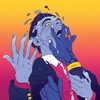

In [22]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
i = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyecto\GTHsprsmall.jpg')
i

### Iteracion 0:

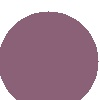

In [24]:
it0 = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyectomyImageSprSmll0.jpg')
it0

### Iteracion 1:

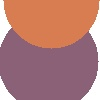

In [30]:
it1 = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyectomyImageSprSmll1.jpg')
it1

### iteracion 5:

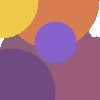

In [26]:
it5 = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyectomyImageSprSmll5.jpg')
it5

### iteracion 10:

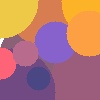

In [31]:
it10 = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyectomyImageSprSmll10.jpg')
it10

### iteracion 100:

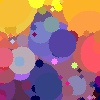

In [32]:
it100 = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyectomyImageSprSmll100.jpg')
it100

### iteracion 500

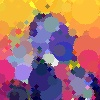

In [33]:
it500 = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyectomyImageSprSmll500.jpg')
it500

### iteracion 2000:

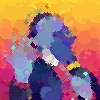

In [37]:
it2000 = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyectomyImageSprSmll1999.jpg')
it2000

### iteracion 4000:

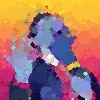

In [39]:
it4000 = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyectomyImageSmll21738.jpg')
it4000

### iteracion 6000:

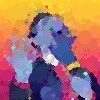

In [40]:
it6000 = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyectomyImageSmll22478.jpg')
it6000

### Iteracion 7500

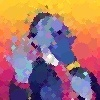

In [41]:
it7500 = Image(filename=r'C:\Users\wachu\Documents\IIA\Semestre 6\Optimizacion & Metaheuristicas II\P2\proyectomyImageSmll23183.jpg')
it7500